In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import astropy.units as u
import astropy.constants as c

In [3]:
%matplotlib inline

In [4]:
class Source():
    """
    The base class for a gravitational wave source.
    """
    name = "Generic Source"
    frequencies =  np.linspace(0, 1e5, 10000) * u.hertz
    M = 30 * u.solMass
    r = 300 * u.parsec
    
    def __init__(self, frequencies=None, M=None, r=None):
        if frequencies: self.frequencies = frequencies
        if r: self.r = r
        if M: self.M = M
      
    def raw_strain(self, frequencies):
        return ((1./r) * ((5*np.pi)/(24*c.c**3))**(0.5) * (c.G * M)**(5./6) * (np.pi*frequencies)**(-7./6)).to(1/u.hertz)
    
    def characteristic_strain(self, frequencies):
        return np.sqrt(4 * frequencies**2 * np.abs(self.raw_strain(frequencies))**2)
    
    def plot(self, axis):
        if axis: 
            axis.loglog(self.frequencies, self.characteristic_strain(self.frequencies), label=self.name, lw=2)
            axis.set_xlabel('Frequency [Hz]')
            #axis.set_ylabel('Root Noise Power spectral density')
            axis.legend()

In [5]:
class Interferometer():
    """
    The base class to describe an interferometer.
    """
    name = "Generic Interferometer"
    f0 = 150 * u.hertz
    fs = 40 * u.hertz
    S0 = 1e-46 / u.hertz
    frequencies =  np.linspace(0, 1e5, 10000) * u.hertz
    
    def __init__(self, frequencies=None):
        if frequencies: self.frequencies = frequencies
    
    def noise_spectrum(self, x):
        return (3.4*x)**(-30) + 34*x**(-1) + (20 * (1 - x**2 + 0.4*x**4))/(1 + 0.5*x**2)
    
    def psd(self, frequencies):
        x = frequencies / self.f0
        xs = self.fs / self.f0
        sh = self.noise_spectrum(x)
        sh[frequencies<self.fs]=np.nan
        return sh * self.S0
    
    def srpsd(self, frequencies):
        return np.sqrt(self.psd(frequencies))
    
    def noise_amplitude(self, frequencies):
        return np.sqrt(self.frequencies*self.psd(frequencies))
    
    def plot(self, axis):
        if axis: 
            axis.loglog(self.frequencies, self.noise_amplitude(self.frequencies), label=self.name, lw=2)
            axis.set_xlabel('Frequency [Hz]')
            axis.set_ylabel('Root Noise Power spectral density')
            axis.legend()

In [6]:
class GEO(Interferometer):
    """
    The GEO600 Interferometer
    """
    name = "GEO600"
    f0 = 150 * u.hertz
    fs = 40 * u.hertz
    S0 = 1e-46 / u.hertz
    
    def noise_spectrum(self, x):
        return (3.4*x)**(-30) + 34*x**(-1) + (20 * (1 - x**2 + 0.4*x**4))/(1 + 0.5*x**2)

In [7]:
class InitialLIGO(Interferometer):
    """
    The iLIGO Interferometer
    """
    name = "Initial LIGO"
    f0 = 150 * u.hertz
    fs = 40 * u.hertz
    S0 = 9e-46 / u.hertz
    
    def noise_spectrum(self, x):
        return (4.49*x)**(-56) + 0.16*x**(-4.52) + 0.52 + 0.32*x**2

In [8]:
class TAMA(Interferometer):
    """
    The TAMA Interferometer
    """
    name = "TAMA"
    f0 = 400 * u.hertz
    fs = 75 * u.hertz
    S0 = 7.5e-46 / u.hertz
    
    def noise_spectrum(self, x):
        return x**(-5) + 13*x**-1 + 9*(1+x**2)

In [9]:
class VIRGO(Interferometer):
    """
    The VIRGO Interferometer
    """
    name = "VIRGO"
    f0 = 500 * u.hertz
    fs = 20 * u.hertz
    S0 = 3.2e-46 / u.hertz
    
    def noise_spectrum(self, x):
        return (7.8*x)**(-5) + 2*x**(-1) + 0.63 + x**2

In [14]:
class CBC(Source):
    """
    A compact binary coallescence source
    """
    name = "CBC"
    def raw_strain(self, frequencies):
        return ((1./self.r) * ((5*np.pi)/(24*c.c**3))**(0.5) * (c.G * self.M)**(5./6) * (np.pi*frequencies)**(-7./6)).to(1/u.hertz)

In [15]:
frequencies = np.linspace(0, 1e5, 1000) * u.hertz
geo = GEO()
iligo = InitialLIGO()
tama = TAMA()
virgo = VIRGO()

In [35]:
cbc = CBC(frequencies= np.logspace(1e-4, 1e5, 10000) * u.hertz, M=100*u.solMass, r=300*1e6*u.parsec)

In [ ]:
CBC

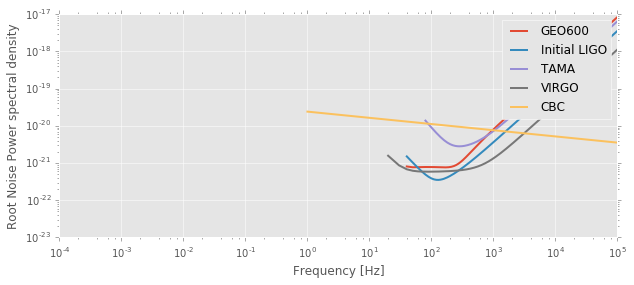

In [36]:
plt.style.use('ggplot')
f, ax = plt.subplots(1, figsize=(10, 4))
geo.plot(axis = ax)
iligo.plot(ax)
tama.plot(ax)
virgo.plot(ax)
cbc.plot(ax)
ax.set_xlim([1e-4,1e5]);
ax.set_ylim([1e-23,1e-17]);

In [35]:
def GEO(frequencies):
    f0 = 150 * u.hertz
    fs = 40 * u.hertz
    S0 = 1e-46 / u.Hertz
    
    x = frequencies / f0
    xs = fs / f0
    
    sh = (3.4*x)**(-30) + 34*x**(-1) + (20 * (1 - x**2 + 0.4*x**4))/(1 + 0.5*x**2) 
    sh[frequencies<fs]=np.nan
    
    return sh * S0

In [157]:
frequencies = np.linspace(0, 1e5, 1000) * u.hertz

In [38]:
def cbc_strain(f, M, r):
    #return 1.44e-22 * (f/(100.*u.hertz))**(-2.0/3) * (M/(1.22*u.solMass))**(5./3) * ((10*1e6*u.parsec)/r)
    return ((1./r) * ((5*np.pi)/(24*c.c**3))**(0.5) * (c.G * M)**(5./6) * (np.pi*f)**(-7./6)).to(1/u.hertz)

In [46]:
(4*(1e-3*u.hertz)**2*np.abs((cbc_strain(1e-3*u.hertz, M, r).to(1/u.hertz))**2))**(0.5)

<Quantity 2.8015690208126614e-20>

In [40]:
M = 30*u.solMass
r = 300*1e6*u.parsec